In [482]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

In [483]:
df = pd.read_excel("Flight_Data.xlsx")

In [484]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In case data is present is clean and clear so we can easily perform the EDA task and train the model

In [485]:
df.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [486]:
df.shape

(10683, 11)

In [487]:
a = pd.DataFrame(df.columns)
a

,0
0,Airline
1,Date_of_Journey
2,Source
3,Destination
4,Route
5,Dep_Time
6,Arrival_Time
7,Duration
8,Total_Stops
9,Additional_Info


In [488]:
# Replacing columns with lower case letter 
df.columns = df.columns.str.lower()

In [489]:
df.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'route',
       'dep_time', 'arrival_time', 'duration', 'total_stops',
       'additional_info', 'price'],
      dtype='object')

In [490]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0


In [491]:
df.dtypes

airline            object
date_of_journey    object
source             object
destination        object
route              object
dep_time           object
arrival_time       object
duration           object
total_stops        object
additional_info    object
price               int64
dtype: object

In [492]:
df.head(2)

,airline,date_of_journey,source,destination,route,dep_time,arrival_time,duration,total_stops,additional_info,price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [493]:
# checking the null value :
df.isna().sum()

airline            0
date_of_journey    0
source             0
destination        0
route              1
dep_time           0
arrival_time       0
duration           0
total_stops        1
additional_info    0
price              0
dtype: int64

In case only 2 missing value which probabliy affect the atmost 2 row , so we can easily manage this data so we can exclude them

In [494]:
df.dropna(inplace=True)

In [495]:
df.isna().sum()

airline            0
date_of_journey    0
source             0
destination        0
route              0
dep_time           0
arrival_time       0
duration           0
total_stops        0
additional_info    0
price              0
dtype: int64

In [496]:
df.head()

,airline,date_of_journey,source,destination,route,dep_time,arrival_time,duration,total_stops,additional_info,price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


Let Perform Some EDA :-
Let's start with 1st columns

In [497]:
df.airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: airline, dtype: int64

###  Top 8 Airline in India 

In [498]:
data= df.airline.value_counts()[:8]
data

Jet Airways          3849
IndiGo               2053
Air India            1751
Multiple carriers    1196
SpiceJet              818
Vistara               479
Air Asia              319
GoAir                 194
Name: airline, dtype: int64

In [499]:
print(data.index)

Index(['Jet Airways', 'IndiGo', 'Air India', 'Multiple carriers', 'SpiceJet',
       'Vistara', 'Air Asia', 'GoAir'],
      dtype='object')


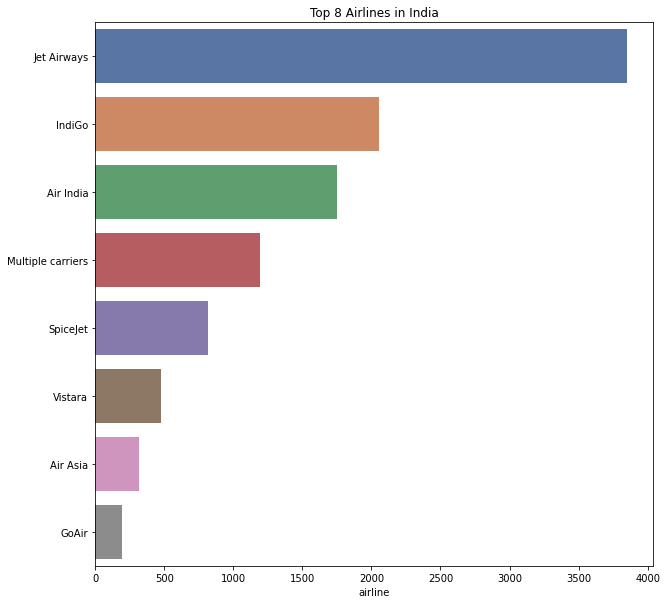

In [500]:
plt.figure(figsize=(10,10))
sns.barplot(x = data,y= data.index ,palette ="deep")
plt.title("Top 8 Airlines in India")
plt.show()



##### Conclusion:-
* Jet Airways Operates the Most no.of the Flights in India
* Jet Airways, IndiGo , Air India,Spicejet,Multiple carries are mojor chunk of the flights

### Distribution of Ticket Price

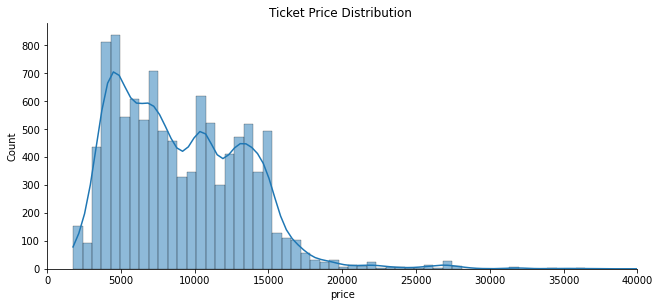

In [501]:
#plt.figure(figsize=(10,10))
ticket_price = sns.displot(x= df.price , data = df , kde = True)
plt.title("Ticket Price Distribution ")
ticket_price.set(xlim = (0,40000))
ticket_price.fig.set_figwidth(10)
ticket_price.fig.set_figheight(4)

##### Conclusion:-
* Most of ticket are Price range b/w 4k-15k
* there are few outlier ranging upto 25k
* the Most expensive Price of the Ticket is 79512

In [502]:
df[df["price"]==79512]

,airline,date_of_journey,source,destination,route,dep_time,arrival_time,duration,total_stops,additional_info,price
2924,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512


### Busiest Air Routes in The DataSet:

In [503]:
# Busiest top 10 routes
df.route.value_counts()[:10]

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
CCU → DEL → BLR           565
BLR → BOM → DEL           402
MAA → CCU                 381
DEL → HYD → COK           326
DEL → JAI → BOM → COK     240
Name: route, dtype: int64

In [504]:
busy_route = pd.DataFrame(df.route.value_counts()[:10])
busy_route

,route
DEL → BOM → COK,2376
BLR → DEL,1552
CCU → BOM → BLR,979
CCU → BLR,724
BOM → HYD,621
CCU → DEL → BLR,565
BLR → BOM → DEL,402
MAA → CCU,381
DEL → HYD → COK,326
DEL → JAI → BOM → COK,240


In [505]:
busy_route = df['route'].value_counts().reset_index().set_index('index')[:10]
busy_route

,route
index,
DEL → BOM → COK,2376
BLR → DEL,1552
CCU → BOM → BLR,979
CCU → BLR,724
BOM → HYD,621
CCU → DEL → BLR,565
BLR → BOM → DEL,402
MAA → CCU,381
DEL → HYD → COK,326


<AxesSubplot:xlabel='index', ylabel='route'>

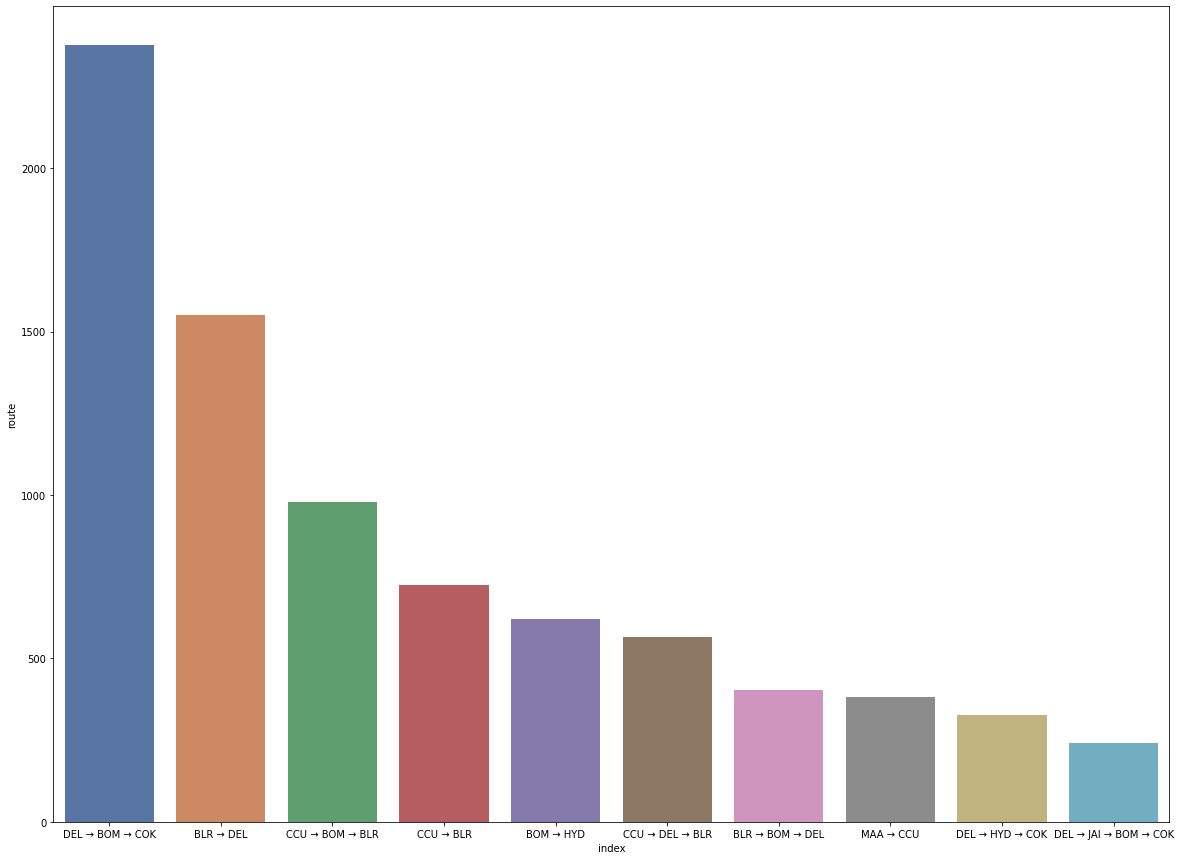

In [506]:
plt.figure(figsize=(20,15))
sns.barplot(x = busy_route.index , y = busy_route.route,palette ="deep")

##### Conclusion
* Delhi to cochin via Bombay is the Busiest route with 2376 flights
* Some of flights are --> Banglore-Delhi , kolkata-Banglore via Bombay, kolkata-Banglore direct, Bombay-Hydrabad etc

In [507]:
df.head(2)

,airline,date_of_journey,source,destination,route,dep_time,arrival_time,duration,total_stops,additional_info,price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


### Departure

In [508]:
# Departure
departure = df["source"].value_counts()
pd.DataFrame(departure).reset_index().set_index('index')

,source
index,
Delhi,4536
Kolkata,2871
Banglore,2197
Mumbai,697
Chennai,381


Index(['Delhi', 'Kolkata', 'Banglore', 'Mumbai', 'Chennai'], dtype='object')
[4536 2871 2197  697  381]


Text(0, 0.5, 'No. of Flights')

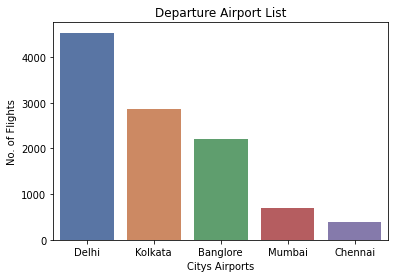

In [509]:
print(departure.index)
print(departure.values)
sns.barplot(x = departure.index,y= departure.values ,palette ="deep")
plt.title("Departure Airport List")
plt.xlabel("Citys Airports")
plt.ylabel("No. of Flights")

##### Conclusion
* As shown in the list most no. of file depature is : Delhi 4536 flights followed by kolkata and Banglore etc

In [510]:
# Arrival
arrival = df["destination"].value_counts()
pd.DataFrame(arrival).reset_index().set_index('index')

,destination
index,
Cochin,4536
Banglore,2871
Delhi,1265
New Delhi,932
Hyderabad,697
Kolkata,381


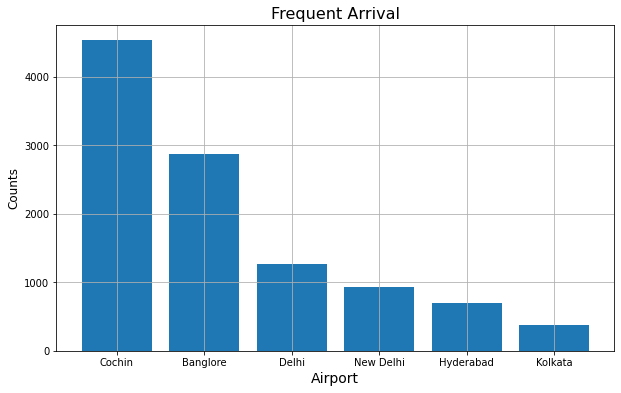

In [511]:
fig, ax = plt.subplots()
ax.bar(arrival.index,arrival.values)
ax.set_title("Frequent Arrival",fontdict={'size':16})
ax.set_xlabel("Airport",fontdict ={'size':14})
ax.set_ylabel("Counts",fontdict = {'size':12})
ax.grid()

fig.set_size_inches(10,6)
plt.show()

##### Conclusion
* As shown in the list most no. of file Arrive is : Kolkata 4536 flights followed by Banglore , Delhi etc

### Peak Day Of The Month:

In [512]:
df1 = df.copy()
df1['date'] = df1['date_of_journey'].str.split('/').str[0]
df1['month'] = df1['date_of_journey'].str.split('/').str[1]
df1["year"] = df1["date_of_journey"].str.split('/').str[2]

In [513]:
df1.head()

,airline,date_of_journey,source,destination,route,dep_time,arrival_time,duration,total_stops,additional_info,price,date,month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [514]:
df1["year"].value_counts()

2019    10682
Name: year, dtype: int64

In [515]:
df1["month"].unique()

array(['03', '05', '06', '04'], dtype=object)

In [516]:
df1["month"].value_counts()

05    3465
06    3414
03    2724
04    1079
Name: month, dtype: int64

* This show me data contain 4 month only 

In [517]:
#df1[df1["month"]==3]
df1["date"].unique()

array(['24', '1', '9', '12', '01', '27', '18', '3', '15', '6', '21', '06',
       '09', '03'], dtype=object)

In [518]:
df1["date"] = df1["date"].astype("int32")
df1["month"]  = df1["month"].astype("int32")
df1["year"] = df1["year"].astype("int32")

In [519]:
df1.dtypes

airline            object
date_of_journey    object
source             object
destination        object
route              object
dep_time           object
arrival_time       object
duration           object
total_stops        object
additional_info    object
price               int64
date                int32
month               int32
year                int32
dtype: object

In [520]:
x = df1.groupby("month")["date"].value_counts()

In [521]:
x

month  date
3      21      423
       6       403
       24      323
       3       315
       9       302
       27      299
       1       199
       15      162
       18      156
       12      142
4      1       257
       9       125
       3       110
       6       100
       27       94
       24       92
       15       89
       21       82
       18       67
       12       63
5      18      504
       21      497
       9       484
       15      405
       27      382
       24      286
       6       281
       1       277
       12      259
       3        90
6      6       503
       9       495
       12      493
       27      355
       24      351
       1       342
       3       333
       15      328
       21      109
       18      105
Name: date, dtype: int64

In [522]:
x.index

MultiIndex([(3, 21),
            (3,  6),
            (3, 24),
            (3,  3),
            (3,  9),
            (3, 27),
            (3,  1),
            (3, 15),
            (3, 18),
            (3, 12),
            (4,  1),
            (4,  9),
            (4,  3),
            (4,  6),
            (4, 27),
            (4, 24),
            (4, 15),
            (4, 21),
            (4, 18),
            (4, 12),
            (5, 18),
            (5, 21),
            (5,  9),
            (5, 15),
            (5, 27),
            (5, 24),
            (5,  6),
            (5,  1),
            (5, 12),
            (5,  3),
            (6,  6),
            (6,  9),
            (6, 12),
            (6, 27),
            (6, 24),
            (6,  1),
            (6,  3),
            (6, 15),
            (6, 21),
            (6, 18)],
           names=['month', 'date'])

In [523]:
x.values

array([423, 403, 323, 315, 302, 299, 199, 162, 156, 142, 257, 125, 110,
       100,  94,  92,  89,  82,  67,  63, 504, 497, 484, 405, 382, 286,
       281, 277, 259,  90, 503, 495, 493, 355, 351, 342, 333, 328, 109,
       105])

In [524]:
pd.DataFrame(x)

date
month date      
3     21     423
      6      403
      24     323
      3      315
      9      302
      27     299
      1      199
      15     162
      18     156
      12     142
4     1      257
      9      125
      3      110
      6      100
      27      94
      24      92
      15      89
      21      82
      18      67
      12      63
5     18     504
      21     497
      9      484
      15     405
      27     382
      24     286
      6      281
      1      277
      12     259
      3       90
6     6      503
      9      495
      12     493
      27     355
      24     351
      1      342
      3      333
      15     328
      21     109
      18     105

In [525]:
a = pd.DataFrame(x)
a.columns
a = a.rename(columns={'date': 'Flight_Counts'})
print(a)

            Flight_Counts
month date               
3     21              423
      6               403
      24              323
      3               315
      9               302
      27              299
      1               199
      15              162
      18              156
      12              142
4     1               257
      9               125
      3               110
      6               100
      27               94
      24               92
      15               89
      21               82
      18               67
      12               63
5     18              504
      21              497
      9               484
      15              405
      27              382
      24              286
      6               281
      1               277
      12              259
      3                90
6     6               503
      9               495
      12              493
      27              355
      24              351
      1               342
      3     

In [526]:
a1 = a.loc[3]
dis3 = pd.DataFrame(a1)
print(dis3)
print(dis3.columns)

      Flight_Counts
date               
21              423
6               403
24              323
3               315
9               302
27              299
1               199
15              162
18              156
12              142
Index(['Flight_Counts'], dtype='object')


In [527]:
a2 = a.loc[4]
dis4 = pd.DataFrame(a2)
print(dis4)
print("*"*10)
a3 = a.loc[5]
dis5 = pd.DataFrame(a3)
print(dis5)
print("*"*10)
a6 = a.loc[6]
dis6 = pd.DataFrame(a6)
print(dis6)

      Flight_Counts
date               
1               257
9               125
3               110
6               100
27               94
24               92
15               89
21               82
18               67
12               63
**********
      Flight_Counts
date               
18              504
21              497
9               484
15              405
27              382
24              286
6               281
1               277
12              259
3                90
**********
      Flight_Counts
date               
6               503
9               495
12              493
27              355
24              351
1               342
3               333
15              328
21              109
18              105


Text(0, 0.5, 'Counts')

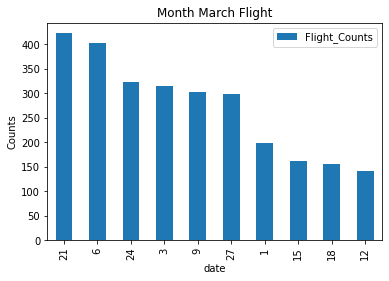

In [528]:
#fig, ax = plt.subplot(figsize = (12,5))
dis3.plot(kind ="bar")
plt.title("Month March Flight")
plt.ylabel("Counts")

Text(0, 0.5, 'Counts')

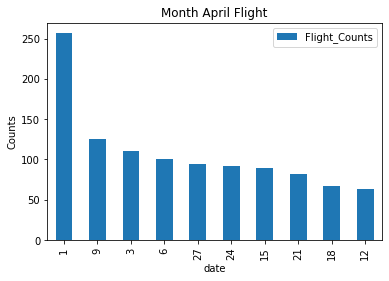

In [529]:
dis4.plot(kind = "bar")
plt.title("Month April Flight")
plt.ylabel("Counts")

Text(0, 0.5, 'Counts')

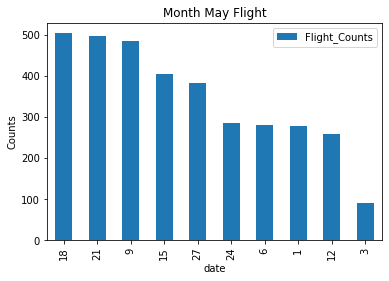

In [530]:
dis5.plot(kind = "bar")
plt.title("Month May Flight")
plt.ylabel("Counts")

Text(0, 0.5, 'Counts')

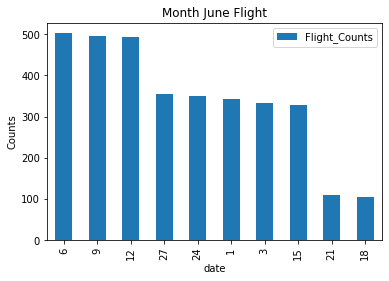

In [531]:
dis6.plot(kind = "bar")
plt.title("Month June Flight")
plt.ylabel("Counts")

In [532]:
df1.head()

,airline,date_of_journey,source,destination,route,dep_time,arrival_time,duration,total_stops,additional_info,price,date,month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


### Peak Days Amongs the Months

In [533]:
Peak_date = df1['date'].value_counts().reset_index().set_index('index')
print(Peak_date)
print("#"*100)
print("Peak Date Index :",Peak_date.index)
print("*"*100)
print("Peak Date Keys :", Peak_date.keys)

       date
index      
9      1406
6      1287
27     1130
21     1111
1      1075
24     1052
15      984
12      957
3       848
18      832
####################################################################################################
Peak Date Index : Int64Index([9, 6, 27, 21, 1, 24, 15, 12, 3, 18], dtype='int64', name='index')
****************************************************************************************************
Peak Date Keys : <bound method NDFrame.keys of        date
index      
9      1406
6      1287
27     1130
21     1111
1      1075
24     1052
15      984
12      957
3       848
18      832>


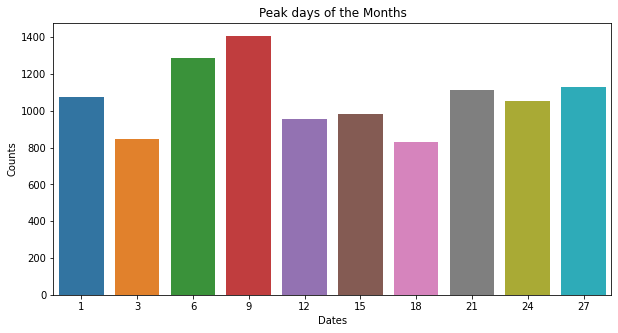

In [534]:
plt.figure(figsize=(10,5))
sns.barplot(x = Peak_date.index , y = Peak_date.date)
plt.title("Peak days of the Months")
plt.xlabel("Dates")
plt.ylabel("Counts")
plt.show()

##### Conclusion:
* Date 9  is the Peak time among all Months

### Price Difference on Individual Days:

Text(-8.700000000000003, 0.5, 'Prices')

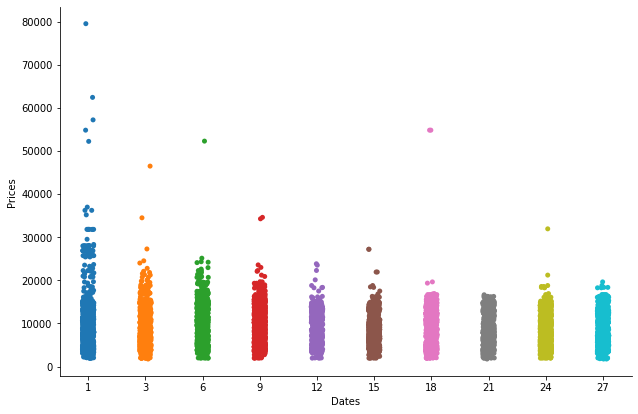

In [535]:
Price_Diff = sns.catplot(x = 'date', y='price',data = df1)
Price_Diff.fig.set_figwidth(10)
Price_Diff.fig.set_figheight(6)
plt.xlabel("Dates")
plt.ylabel("Prices")

### Price Difference on Particular Month

In [538]:
df1['month']= df1['month'].astype('str')

In [551]:
df1['month'] = df1['month'].apply(lambda x:x.replace('3','March'))
df1["month"] = df1["month"].apply(lambda x:x.replace('4',"April"))
df1['month'] = df1["month"].apply(lambda x:x.replace('5',"May"))
df1["month"] = df1["month"].apply(lambda x:x.replace("6","June"))

In [552]:
df1['month'].unique()

array(['March', 'May', 'June', 'April'], dtype=object)

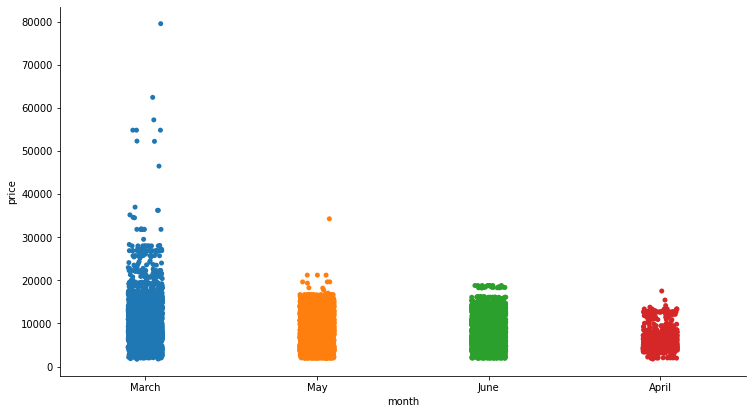

In [556]:
Par_month = sns.catplot(x = 'month', y ='price', data = df1)
Par_month.fig.set_figwidth(12)
Par_month.fig.set_figheight(6)

##### Conclusion:-
* March has the Highest traffic, complare to other months

### Peak Time During the Departure and Arrival 

In [571]:
# for departrue

print(df1["dep_time"])
print(df1["dep_time"].dtype)


print("*"*30)
# for arrival

print(df1["arrival_time"])
print(df1["arrival_time"].dtype)
# In this case time in the form of the HR:MM so we want to create 2 seperate col for the Hr and Min 
# splitting time 

0        22:20
1        05:50
2        09:25
3        18:05
4        16:50
         ...  
10678    19:55
10679    20:45
10680    08:20
10681    11:30
10682    10:55
Name: dep_time, Length: 10682, dtype: object
object
******************************
0        01:10 22 Mar
1               13:15
2        04:25 10 Jun
3               23:30
4               21:35
             ...     
10678           22:25
10679           23:20
10680           11:20
10681           14:10
10682           19:15
Name: arrival_time, Length: 10682, dtype: object
object


In [593]:
# for the departure
df1["dep_hour"] = df1["dep_time"].str.split(':').str[0]
df1["dep_min"] = df1["dep_time"].str.split(':').str[1]

df1["dep_hour"] = df1["dep_hour"].astype("int32")
df1["dep_min"] = df1["dep_hour"].astype("int32")

# for the arrival

df1["arrival_hour"] = df1["arrival_time"].str.split(':').str[0]
df1["arrival_min"] = df1["arrival_time"].str.split(':').str[1]
df1["arrival_min"] = df1["arrival_min"].str.split(' ').str[0]

df1["arrival_hour"] = df1["arrival_hour"].astype("int32")
df1["arrival_min"] = df1["arrival_min"].astype("int32")

In [594]:
df1[["dep_hour","dep_min","arrival_hour","arrival_min"]]

,dep_hour,dep_min,arrival_hour,arrival_min
0,22,22,1,10
1,5,5,13,15
2,9,9,4,25
3,18,18,23,30
4,16,16,21,35
...,...,...,...,...
10678,19,19,22,25
10679,20,20,23,20
10680,8,8,11,20
10681,11,11,14,10


In [595]:
df1["arrival_min"].unique()

array([10, 15, 25, 30, 35,  5,  0, 55, 20, 50, 45, 40], dtype=int32)

### Peak Hour Of Departure

Text(0.5, 6.79999999999999, 'Departure Hours')

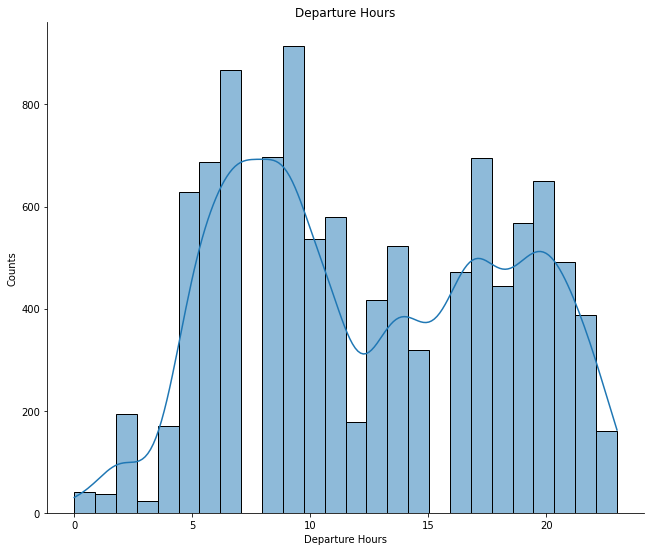

In [615]:
dep_hr = sns.displot(x = df1["dep_hour"],data = df1, kde = True)
plt.title('Departure Hours')
dep_hr.fig.set_figwidth(10)
dep_hr.fig.set_figheight(8)
plt.ylabel("Counts")
plt.xlabel("Departure Hours")

* 8-9 am is the peak hour for the Departure
* least or less no. of flight are departure in late night -->10 pm to 3 am 

### Peak Hour For the Arrival:

Text(0.5, 6.79999999999999, 'Arrival Hours')

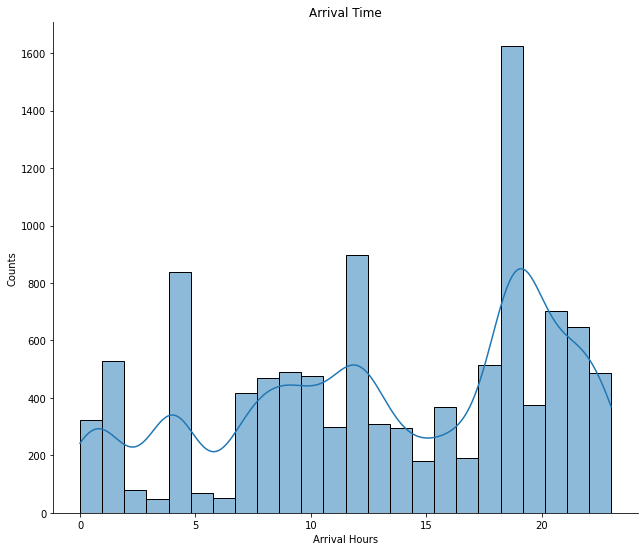

In [614]:
arr_hr = sns.displot(x = df1["arrival_hour"], data = df1 , kde = True)
plt.title("Arrival Time")
arr_hr.fig.set_figwidth(10)
arr_hr.fig.set_figheight(8)
plt.ylabel("Counts")
plt.xlabel("Arrival Hours")

* 6-7 pm is bussiest arrival time for the Airport 

### Distribution of hour in terms of Prices

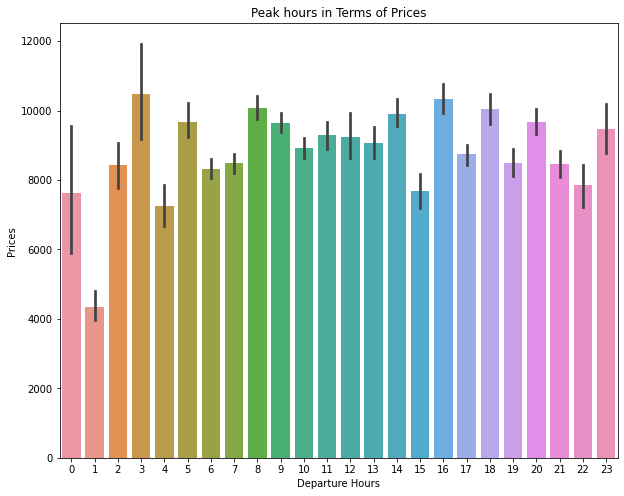

In [613]:
plt.figure(figsize=(10,8))
sns.barplot(x = df1.dep_hour, y = df1.price)
plt.title("Peak hours in Terms of Prices")
plt.ylabel("Prices")
plt.xlabel("Departure Hours")
plt.show()

##### Conclusion:- There is not such time affect in the costing
* Average costing of Flight during Departure 
* Costing of Flight is approx same in most of the time peroid. 
* At 1 am the costing of the flight is least 4300 approx



### PAIR Plot 
* on the bases of "City"

<Figure size 576x576 with 0 Axes>

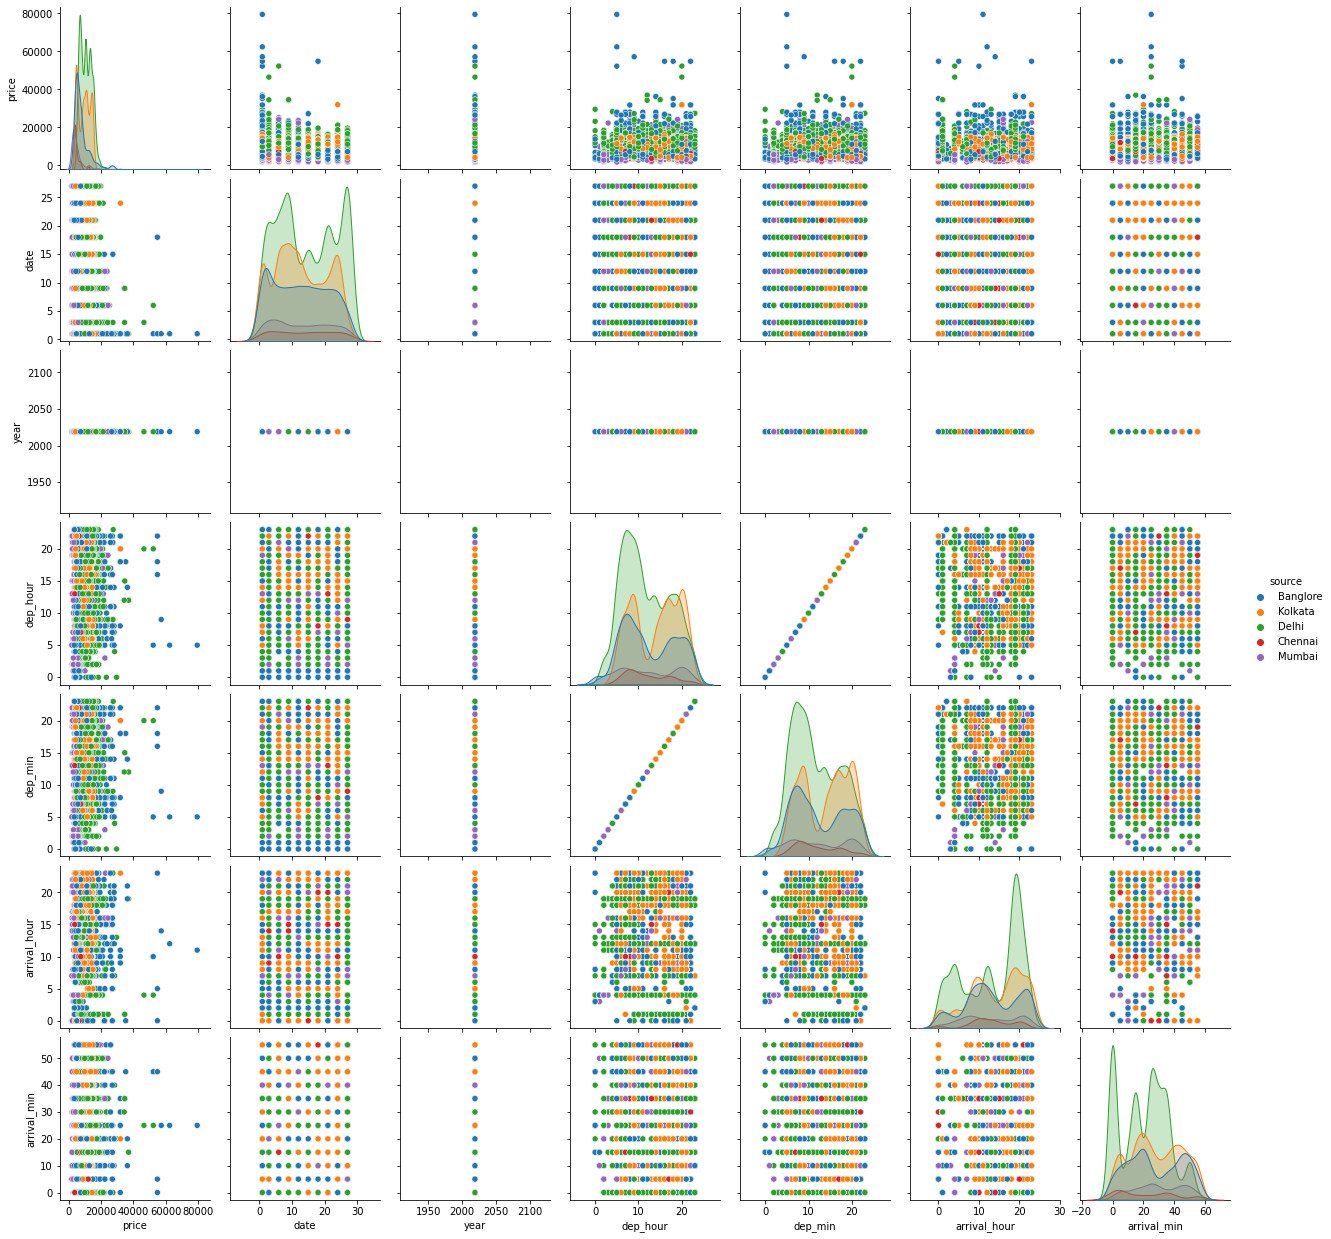

In [618]:
plt.figure(figsize = (8,8))
sns.pairplot(df1 , hue = "source")
plt.show()